In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random
np.random.seed(123)
random.seed(123)

import warnings
warnings.filterwarnings('ignore')

There are several parameters in ML models that must be selected before a model fits to a dataset. These parameters are things like regularization parameters in logistic regresssion and decision trees, or model-specific attributes like the K in KNN.

These are called **hyperparameters** and they are selected *before fitting models to the data* and remain *unchanged* after the fitting is complete.

How do we decide what values to select to ensure good model performance?

- We cannot use training set as models will likely overfit to it.

- We must not use the test set as it is supposed to simulate the unseen real-time data.

##### We choose the hyperparameters using a 'validation set', which is a further divide of the training dataset.

**Training Set**

    -Fit the model to this data.
    -Model specific hyperparameters are chosen.
    
**Validation Set**

    -Used to tune the model's hyperparameters.
    -This serves as a somewhat unbiased estimate of model's performance.
    
**Test Set**

    -The tuned hyperparameters from validation set are then used for test set to get final outputs
    -This serves as a totally unbiased estimate of model's performance on new data.
    
    
    
**Important gist**: Train & validation sets are used to **tune parameters** of the model. The test set should **never** be used to tune them; only completely tuned model should see the test data. Before a model is used on the test set, it is fixed and will not be tuned anymore.

As an example, we can split the data 80-20 as:

**Train+Validation set** containing 80% of the data

**Test set** containing 20% of the data

We keep the 20% test set aside and dont touch it. We then further split train+validation into say 70-30 meaning 70% of the main Train+Validation set (80%) will be assigned to the train set and 30% of 80% will be assigned to validation set.

#### Implementation


In [9]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [8]:
# splitting the dataset into 80-20
# 20% is test data
# 80% is train+validation data
# train+validation is assigned as X_remainder, y_remainder

from sklearn.model_selection import train_test_split

X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# splitting train+validation further into 70-30 component

X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size=0.3, random_state=42)

- Let's use the train and validation data to find best hyperparameter in logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression

train_score = []
validation_score = []

C_values = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# iterating over all the C values for logistic regression
for value in C_values:
    logreg = LogisticRegression(C = value, random_state=1)
    logreg.fit(X_train, y_train) #fitting on training data
    
    tscore = logreg.score(X_train, y_train) #scoring on trainig data
    vscore = logreg.score(X_validation, y_validation) #scoring on validation data
    
    train_score.append(tscore) #adding training score at each C value to the list
    validation_score.append(vscore) #adding validation score at each C value to the list

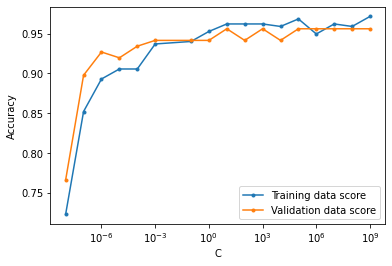

In [20]:
# plotting the model accuracy at each C value

plt.figure()
plt.plot(C_values, train_score, label='Training data score', marker='.')
plt.plot(C_values, validation_score, label='Validation data score', marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- Based on this plot, it seems that at C = 10, the model achieved best performance.

- Using this information, we can take the test data and evaluate model's accuracy on the unseen data. For the final logistic regression with C=10, we actually retrain the model on Train+Validation data aka _remainder data_ and then get the prediction on test set

In [21]:
final_logreg = LogisticRegression(C=10, random_state=1)

# X_remainder, y_remainder held the original split data
final_logreg.fit(X_remainder, y_remainder)

# scoring on test set
final_logreg.score(X_test, y_test)

0.9736842105263158